[대구 전출입자 분석 및 원인파악] <hr>

In [706]:
# 모듈 로딩딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import openpyxl as xl


In [707]:
'''
mDF: 시도별 전출입 인구 데이터
mDaeguDF: 대구로 전입 인구 데이터
'''

'\nmDF: 시도별 전출입 인구 데이터\nmDaeguDF: 대구로 전입 인구 데이터\n'

In [708]:
# 데이터 확인
mDF=pd.read_excel('../DATA/시도별 전출입 인구수.xlsx',header=0)
# [데이터 전처리]
# nan처리
mDF.fillna(method='ffill',inplace=True)
# 불필요한 행 처리
mDF.drop(0,inplace=True)
for x in mDF[mDF['전출지별']=='전국'].index:
    mDF.drop(x,inplace=True,axis=0)
mDF

C:\Users\gy931\AppData\Local\Temp\ipykernel_12544\1307959864.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mDF.fillna(method='ffill',inplace=True)


,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
20,서울특별시,서울특별시,1232619,1158556,985945,1345508,1511726,2401970,2041724,2212213,...,1426213,1286855,1199708,1215122,1069300,1053008,1098023,1129529,1061915,1018807
21,서울특별시,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,서울특별시,인천광역시,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,제주특별자치도,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,제주특별자치도,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,제주특별자치도,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,제주특별자치도,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [709]:
# [데이터 확인]
# mDF.info()
mDF.describe(include='all')

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,306,306,306,306,306,306,306,306,306,306,...,306,306,306,306,306,306,306,306,306,306
unique,17,18,133,133,133,133,132,133,133,133,...,271,271,271,273,304,301,302,305,303,304
top,서울특별시,전국,-,-,-,-,-,-,-,-,...,-,-,-,-,3913,676,2026,1468,4303,2000
freq,18,17,174,174,174,174,174,174,174,174,...,34,34,34,34,2,2,2,2,2,2


In [710]:
# 데이터 처리 - 대구 전입자만 추출
mDaeguDF=mDF[mDF['전입지별']=='대구광역시']
mDaeguDF.describe()
mDaeguDF.replace('-',np.nan,inplace=True)

'''
중간 분석: 1970 ~ 1980까지 인구수 이동 정보 확인이 안됨
- 1981년 부로 경상북도 대구시에서 대구직할시로 승격
- 나머지 광역시도 비슷한 이유로 추정
- 미측정값 경상북도 인원수와 대구직할시 인구비율로 추정치 산입
'''
mDaeguDF.isna().sum()
mDaeguDF.reset_index(drop=True,inplace=True)



C:\Users\gy931\AppData\Local\Temp\ipykernel_12544\1819505514.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mDaeguDF.replace('-',np.nan,inplace=True)
C:\Users\gy931\AppData\Local\Temp\ipykernel_12544\1819505514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mDaeguDF.replace('-',np.nan,inplace=True)


In [711]:
# [대구직할시 추정치 확인 및 산입]
eDaeguDF=mDF[mDF['전입지별']=='경상북도'].loc[:,:'1980'].reset_index(drop=True)
eDaeguDF.drop(list(range(2,8)),inplace=True)
eDaeguDF.reset_index(drop=True,inplace=True)
eDaeguDF

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980
0,서울특별시,경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,48839
1,부산광역시,경상북도,7791,10233,12697,16373,16203,30395,27465,28592,30724,31843,36580
2,경기도,경상북도,6171,7241,9208,10379,11731,18490,14853,16871,17805,17743,20064
3,강원도,경상북도,10916,10880,12269,14990,13647,18758,15512,16618,17155,16602,15911
4,충청북도,경상북도,5833,6115,5790,6458,6651,12886,8872,9177,11168,9474,9626
5,충청남도,경상북도,4848,5354,5549,6175,6342,14030,9160,9050,10660,8795,9564
6,전라북도,경상북도,4319,3799,3370,3898,4718,9915,5627,6164,7912,5983,6727
7,전라남도,경상북도,4377,4778,3572,4039,4721,10416,6849,6708,8444,6875,7691
8,경상북도,경상북도,326668,384273,427599,484785,442652,1003878,565093,683083,747774,727036,804100
9,경상남도,경상북도,24476,20981,16913,20947,22550,50864,37658,36695,38324,37823,41718


In [712]:
# [추정치 계산]
# 1970년 대구직할시/경상북도: 1080819/4476067
# 1975년 대구직할시/경상북도: 1309131/4858551
# 1980년 대구직할시/경상북도: 1603781/4954559
# [나머지 연에 따른 인원 추정치 계산: 증감률]
x=1309131-1080819 # 대구: 1970 ~ 1975
y=4858551-4476067 # 경상북도: 1970 ~ 1975
list1=[]
list2=[]
for a in range(6):
    list1.append(round(1080819+a*x/5))
    list2.append(round(4476067+a*y/5))
print(list1)
print(list2)
list3=[]
list4=[]

x=1603781-1309131 # 대구: 1970 ~ 1975
y=4954559-4858551
for a in range(6):
        list3.append(round(1309131+a*x/5))
        list4.append(round(4858551+a*y/5))
print(list3)
print(list4)
sr1=pd.Series(list1)/pd.Series(list2)
sr2=pd.Series(list3)/pd.Series(list4)
ecalDF=pd.concat([sr1,sr2],ignore_index=True).drop(6)
ecalDF.reset_index(drop=True,inplace=True)
ecalDF


[1080819, 1126481, 1172144, 1217806, 1263469, 1309131]
[4476067, 4552564, 4629061, 4705557, 4782054, 4858551]
[1309131, 1368061, 1426991, 1485921, 1544851, 1603781]
[4858551, 4877753, 4896954, 4916156, 4935357, 4954559]


0     0.241466
1     0.247439
2     0.253214
3     0.258802
4     0.264211
5     0.269449
6     0.280470
7     0.291404
8     0.302253
9     0.313017
10    0.323698
dtype: float64

In [713]:
# [추정치 계산]
for x in range(2,13):
    eDaeguDF.iloc[:,x]=eDaeguDF.iloc[:,x]*ecalDF[x-2]
eDaeguDF
eDaeguDF.iloc[:,2:]=eDaeguDF.iloc[:,2:].astype('int64')

eDaeguDF=pd.concat([eDaeguDF.iloc[:2],mDaeguDF.iloc[2:8,:13],eDaeguDF.iloc[2:]])
eDaeguDF.fillna(0,inplace=True)
eDaeguDF.reset_index(drop=True,inplace=True)
mDaeguDF.fillna(0,inplace=True)
mDaeguDF.fillna(0,inplace=True)
add_Daegu=eDaeguDF.loc[14]
eDaeguDF.loc[14]=0
eDaeguDF.loc[2]=add_Daegu
eDaeguDF

C:\Users\gy931\AppData\Local\Temp\ipykernel_12544\1509832085.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  eDaeguDF.fillna(0,inplace=True)
C:\Users\gy931\AppData\Local\Temp\ipykernel_12544\1509832085.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mDaeguDF.fillna(0,inplace=True)
C:\Users\gy931\AppData\Local\Temp\ipykernel_12544\1509832085.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980
0,서울특별시,경상북도,2865,4072,5589,7125,7107,12442,11324,11992,12978,13636,15809
1,부산광역시,경상북도,1881,2532,3215,4237,4281,8189,7703,8331,9286,9967,11840
2,경상북도,경상북도,78879,95084,108274,125463,116953,270493,158491,199052,226016,227574,260285
3,인천광역시,대구광역시,0,0,0,0,0,0,0,0,0,0,0
4,광주광역시,대구광역시,0,0,0,0,0,0,0,0,0,0,0
5,대전광역시,대구광역시,0,0,0,0,0,0,0,0,0,0,0
6,울산광역시,대구광역시,0,0,0,0,0,0,0,0,0,0,0
7,세종특별자치시,대구광역시,0,0,0,0,0,0,0,0,0,0,0
8,경기도,경상북도,1490,1791,2331,2686,3099,4982,4165,4916,5381,5553,6494
9,강원도,경상북도,2635,2692,3106,3879,3605,5054,4350,4842,5185,5196,5150


In [714]:
mDaeguDF.iloc[:,2:13]=mDaeguDF.iloc[:,2:13]+ eDaeguDF.iloc[:,2:]
mDaeguDF.iloc[:,2:]=mDaeguDF.iloc[:,2:].astype('int64')
mDaeguDF

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,서울특별시,대구광역시,2865.0,4072.0,5589.0,7125.0,7107.0,12442.0,11324.0,11992.0,...,9720.0,10464.0,10277.0,10397.0,10135,10631,10062,10191,9623,8891
1,부산광역시,대구광역시,1881.0,2532.0,3215.0,4237.0,4281.0,8189.0,7703.0,8331.0,...,4922.0,4785.0,5066.0,4981.0,5225,5027,5300,4553,4616,4506
2,대구광역시,대구광역시,78879.0,95084.0,108274.0,125463.0,116953.0,270493.0,158491.0,199052.0,...,311113.0,298755.0,274649.0,276495.0,254661,258107,252642,259185,240722,236143
3,인천광역시,대구광역시,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1680.0,1672.0,1628.0,1585.0,1702,1795,1734,1691,1551,1590
4,광주광역시,대구광역시,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,553.0,564.0,536.0,572.0,668,676,746,547,577,647
5,대전광역시,대구광역시,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1783.0,1859.0,1757.0,1848.0,1734,1762,1818,1667,1710,1524
6,울산광역시,대구광역시,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2853.0,3003.0,3150.0,2874.0,3054,3282,3275,3189,3216,3335
7,세종특별자치시,대구광역시,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,91,109,192,219,263,340
8,경기도,대구광역시,1490.0,1791.0,2331.0,2686.0,3099.0,4982.0,4165.0,4916.0,...,10024.0,10225.0,10763.0,11163.0,11026,11009,10961,10043,9627,8872
9,강원도,대구광역시,2635.0,2692.0,3106.0,3879.0,3605.0,5054.0,4350.0,4842.0,...,1819.0,1860.0,1653.0,1703.0,1838,1701,1549,1735,1818,1536


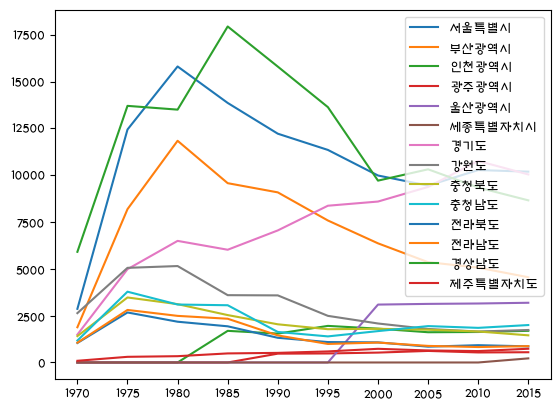

In [ ]:
# [데이터 시각화]
font_name=fm.FontProperties(fname='C:\Windows\Fonts\HancomHoonminjeongeumH.ttf').get_name()
rc('font', family=font_name)
for x in range(len(mDaeguDF.index)):
    if x in [2,14]: pass
    else: 
        plt.plot(mDaeguDF.columns[2::5],mDaeguDF.iloc[x,2::5],label=mDaeguDF.iloc[x,0])
        plt.legend(loc='upper right')

In [ ]:
'''
1970년 이후 증가하는 원인분석
분석1. 경부고속도로 완공에 따라 교통의 편리함으로 인한 이주의 편리성

1975년 큰 폭으로 증가하는 원인분석
분석 1. 베트남전쟁 종료 
분석 2. 경제개발 1차 5주년 계획으로 국외수출이 주된 정부정책으로 경공업이 중시됨
분석 3. 경제개발 2차 5주년 계획으로 중화학단지 이외 제조업(섬유) 정부정책으로 대구가 선정
분석 4.정부의 산업화 정책으로 농촌인구들을 대도시의 이주를 장려

1985년 광주로 부터 전입자가 늘어난 원인분석
분석 1. 전두환정부 때 광주가 다른지역보다 지역적 차별을 많이 받았기에 국가정책의 흐름

이후
분석 1. 대구 내 대기업과 공기업 등 일 자리가 부족
분석 2. 서비스산업과 IT산업 등 발전으로 제조업(경공업)의 부가가치 하락으로 일자리가 없어짐
       - 주거목적인 전입 외 다른 목적으로 전입하는 경우는 거의 없음음
'''